In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as skm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image  
 



plt.rcParams["figure.figsize"] = (8, 5)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

/Users/hamzaensar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/Users/hamzaensar/Desktop/Bootcamp/loan_dataset.csv')

In [4]:
df0=df.copy()

In [5]:
df0

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.000,Graduate,No,5849.000,0.000,NaN,360.000,1.000,Urban,Y
1,LP001003,Male,Yes,1.000,Graduate,No,4583.000,1508.000,128.000,360.000,1.000,Rural,N
2,LP001005,Male,Yes,0.000,Graduate,Yes,3000.000,0.000,66.000,360.000,1.000,Urban,Y
3,LP001006,Male,Yes,0.000,Not Graduate,No,2583.000,2358.000,120.000,360.000,1.000,Urban,Y
4,LP001008,Male,No,0.000,Graduate,No,6000.000,0.000,141.000,360.000,1.000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,LP002979,Male,Yes,3.000,Graduate,No,4106.000,0.000,40.000,180.000,1.000,Rural,Y
611,LP002983,Male,Yes,1.000,Graduate,No,8072.000,240.000,253.000,360.000,1.000,Urban,Y
612,LP002984,Male,Yes,2.000,Graduate,No,7583.000,0.000,187.000,360.000,1.000,Urban,Y
613,LP002990,Female,No,0.000,Graduate,Yes,4583.000,0.000,133.000,360.000,0.000,Semiurban,N


In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(6), object(7)
memory usage: 62.6+ KB


In [7]:
df0.isna().sum()

Loan_ID               1
Gender               14
Married               4
Dependents           16
Education             1
Self_Employed        33
ApplicantIncome       1
CoapplicantIncome     1
LoanAmount           23
Loan_Amount_Term     15
Credit_History       51
Property_Area         1
Loan_Status           1
dtype: int64

In [8]:
df0.shape

(615, 13)

In [9]:
df0.isnull().sum() / df0.shape[0] * 100

Loan_ID             0.163
Gender              2.276
Married             0.650
Dependents          2.602
Education           0.163
Self_Employed       5.366
ApplicantIncome     0.163
CoapplicantIncome   0.163
LoanAmount          3.740
Loan_Amount_Term    2.439
Credit_History      8.293
Property_Area       0.163
Loan_Status         0.163
dtype: float64

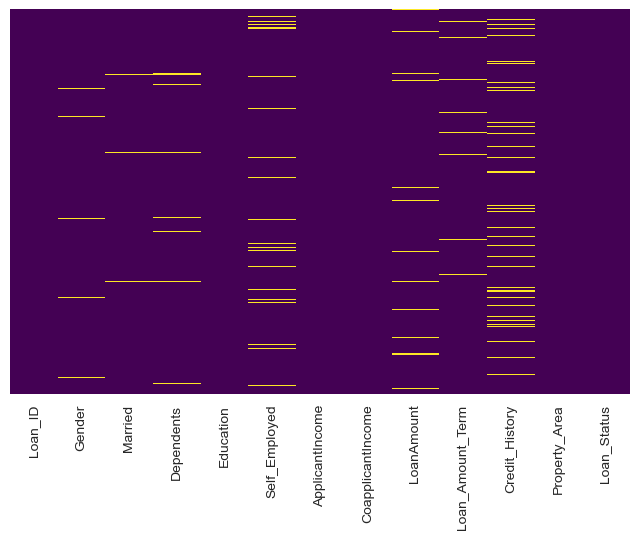

In [10]:
sns.heatmap(df0.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [11]:
df0.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        14
Name: Gender, dtype: int64

In [12]:
df0.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      4
Name: Married, dtype: int64

In [13]:
df0['Dependents']=df0.Dependents.astype(str)

In [14]:
df0.Dependents.value_counts(dropna=False)

0.0    345
1.0    102
2.0    101
3.0     51
nan     16
Name: Dependents, dtype: int64

In [15]:
df0.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
NaN               1
Name: Education, dtype: int64

In [16]:
df0.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     33
Name: Self_Employed, dtype: int64

In [17]:
df0.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
NaN            1
Name: Property_Area, dtype: int64

In [18]:
df0.Loan_Status.value_counts(dropna=False)

Y      422
N      192
NaN      1
Name: Loan_Status, dtype: int64

In [19]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.000,5403.459,6109.042,150.000,2877.500,3812.500,5795.000,81000.000
CoapplicantIncome,614.000,1621.246,2926.248,0.000,0.000,1188.500,2297.250,41667.000
LoanAmount,592.000,146.412,85.587,9.000,100.000,128.000,168.000,700.000
Loan_Amount_Term,600.000,342.000,65.120,12.000,360.000,360.000,360.000,480.000
Credit_History,564.000,0.842,0.365,0.000,1.000,1.000,1.000,1.000


- We fill the missing values with most frequent values

In [20]:
df0['Gender'].fillna(df0['Gender'].mode()[0],inplace=True)
df0['Married'].fillna(df0['Married'].mode()[0],inplace=True)
df0['Dependents'].fillna(df0['Dependents'].mode()[0],inplace=True)
df0['Self_Employed'].fillna(df0['Self_Employed'].mode()[0],inplace=True)
df0['Loan_Amount_Term'].fillna(df0['Loan_Amount_Term'].mode()[0],inplace=True)
df0['Credit_History'].fillna(df0['Credit_History'].mode()[0],inplace=True)
df0['Education'].fillna(df0['Education'].mode()[0],inplace=True)
df0['ApplicantIncome'].fillna(df0['ApplicantIncome'].mode()[0],inplace=True)
df0['CoapplicantIncome'].fillna(df0['CoapplicantIncome'].mode()[0],inplace=True)

- We fill the missing values with mean values

In [21]:
df0.LoanAmount=df0.LoanAmount.fillna(df0.LoanAmount.mean())


In [22]:
df0.dropna(how='any',inplace=True)

In [23]:
df0.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- Data Visualization

Number of people who took loan by gender


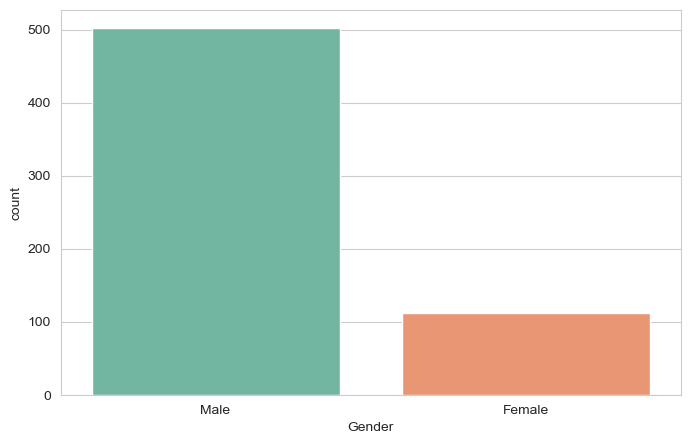

In [24]:
print("Number of people who took loan by gender")
sns.countplot(x='Gender',data=df0,palette='Set2');

Number of people who took loan by Marital staus


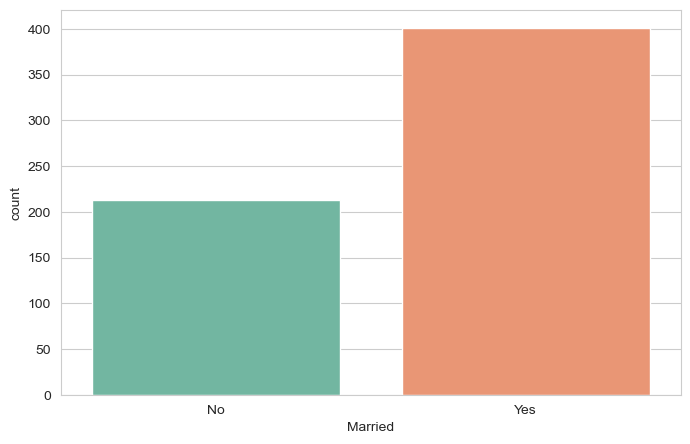

In [25]:
print('Number of people who took loan by Marital staus')
sns.countplot(x='Married',data=df0,palette='Set2');

Number of people who took loan by Dependency


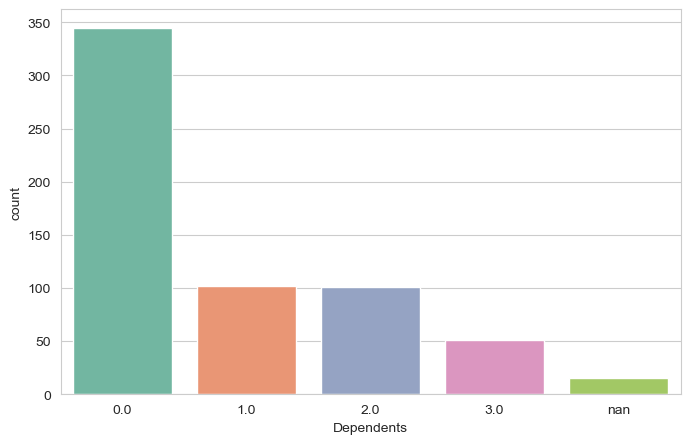

In [26]:
print("Number of people who took loan by Dependency")

sns.countplot(x='Dependents',data=df0,palette='Set2');

Number of people who took loan by CreditHistory


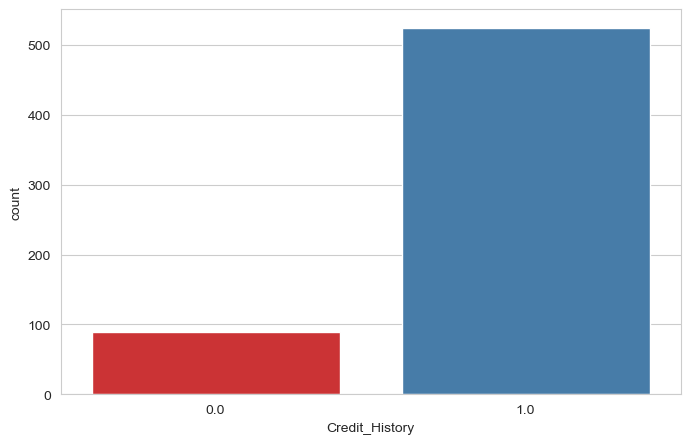

In [27]:
print("Number of people who took loan by CreditHistory")

sns.countplot(x='Credit_History',data=df0,palette='Set1');

Number of people who took loan by Property Area


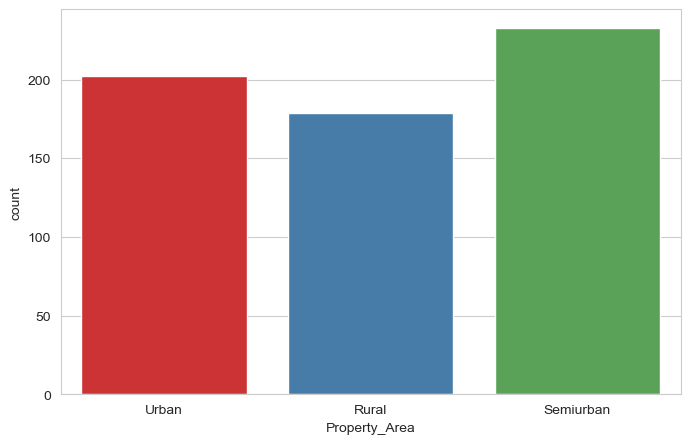

In [28]:
print("Number of people who took loan by Property Area")

sns.countplot(x='Property_Area',data=df0,palette='Set1');

In [29]:
df0

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.000,0.000,146.412,360.000,1.000,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.000,1508.000,128.000,360.000,1.000,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.000,0.000,66.000,360.000,1.000,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.000,2358.000,120.000,360.000,1.000,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.000,0.000,141.000,360.000,1.000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900.000,0.000,71.000,360.000,1.000,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106.000,0.000,40.000,180.000,1.000,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072.000,240.000,253.000,360.000,1.000,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583.000,0.000,187.000,360.000,1.000,Urban,Y


- Encoding the dataset

In [30]:
df0_encoded=df0

In [31]:
df0.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
df0_encoded=pd.get_dummies(df0_encoded,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],drop_first=True)

In [33]:
df0_encoded.drop(['Loan_ID'],axis=1,inplace=True)

In [34]:
df0_encoded

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1.0,Dependents_2.0,Dependents_3.0,Dependents_nan,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.000,0.000,146.412,360.000,1.000,1,0,0,0,0,0,0,0,0,1,1
1,4583.000,1508.000,128.000,360.000,1.000,1,1,1,0,0,0,0,0,0,0,0
2,3000.000,0.000,66.000,360.000,1.000,1,1,0,0,0,0,0,1,0,1,1
3,2583.000,2358.000,120.000,360.000,1.000,1,1,0,0,0,0,1,0,0,1,1
4,6000.000,0.000,141.000,360.000,1.000,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.000,0.000,71.000,360.000,1.000,0,0,0,0,0,0,0,0,0,0,1
610,4106.000,0.000,40.000,180.000,1.000,1,1,0,0,1,0,0,0,0,0,1
611,8072.000,240.000,253.000,360.000,1.000,1,1,1,0,0,0,0,0,0,1,1
612,7583.000,0.000,187.000,360.000,1.000,1,1,0,1,0,0,0,0,0,1,1


In [35]:
df0_encoded.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1.0             0
Dependents_2.0             0
Dependents_3.0             0
Dependents_nan             0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

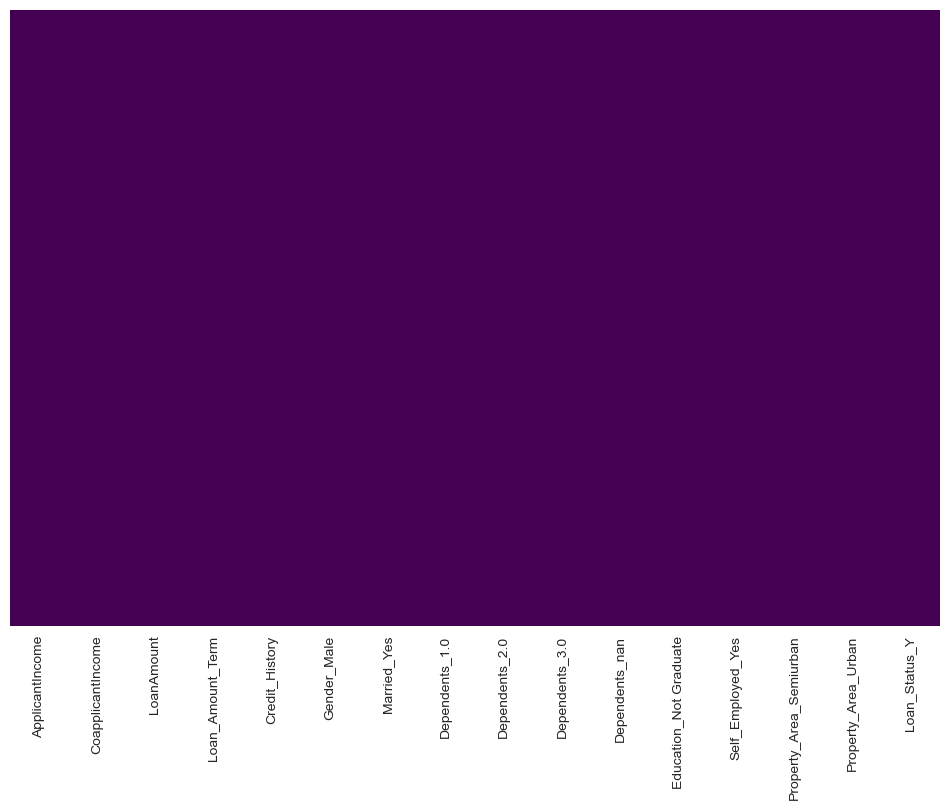

In [36]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(df0_encoded.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

In [37]:
y=df0_encoded['Loan_Status_Y']

In [38]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [39]:
x = df0_encoded.drop('Loan_Status_Y', axis = 1)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [41]:
tree_model = DecisionTreeClassifier()

In [42]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred = tree_model.predict(x_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.59      0.55        37
           1       0.81      0.76      0.78        86

    accuracy                           0.71       123
   macro avg       0.66      0.68      0.67       123
weighted avg       0.72      0.71      0.71       123



In [45]:
decision_accuracy = tree_model.score(x_test, y_test)
print('Decision Tree Model Accuracy:', decision_accuracy * 100, '%')

Decision Tree Model Accuracy: 70.73170731707317 %


In [46]:
forest_model = RandomForestClassifier(n_estimators = 600)

In [47]:
forest_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=600)

In [48]:
forest_y_pred = forest_model.predict(x_test)

In [49]:
print(classification_report(y_test, forest_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.46      0.60        37
           1       0.81      0.97      0.88        86

    accuracy                           0.81       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.82      0.81      0.79       123



In [50]:
forest_accuracy = forest_model.score(x_test, y_test)
print('Random Forest Model Accuracy:', forest_accuracy * 100, '%')

Random Forest Model Accuracy: 81.30081300813008 %


In [51]:
features = list(df0_encoded.columns[1:])
features

['CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Male',
 'Married_Yes',
 'Dependents_1.0',
 'Dependents_2.0',
 'Dependents_3.0',
 'Dependents_nan',
 'Education_Not Graduate',
 'Self_Employed_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Loan_Status_Y']

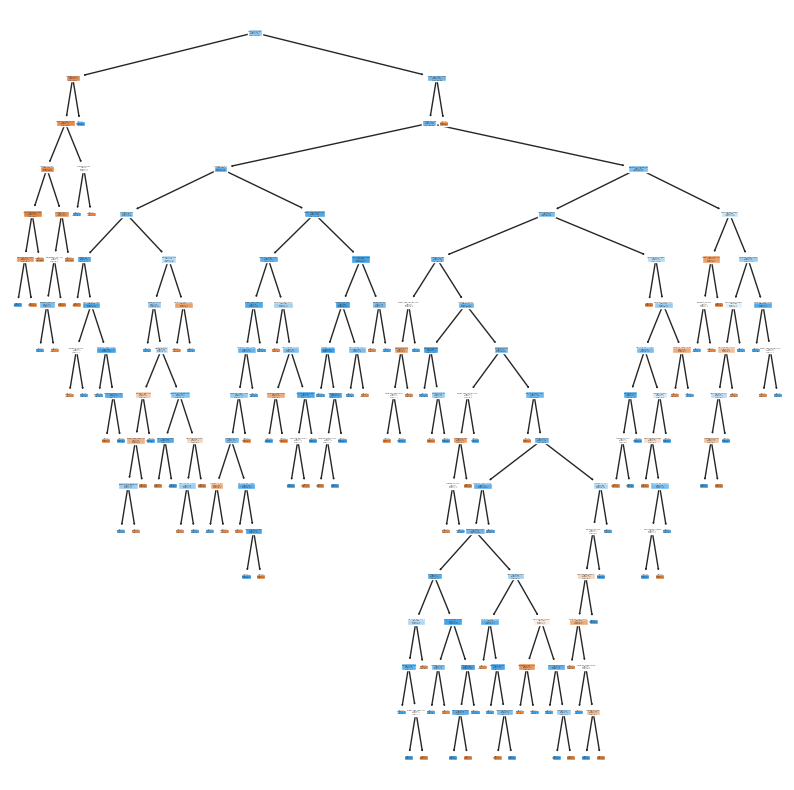

In [52]:
plt.figure(figsize=(10, 10))
tree.plot_tree(tree_model, feature_names=x.columns, filled=True)
plt.savefig('decision_tree_graph.png')
plt.show()


In [53]:
print('Decision Tree Model Accuracy:', decision_accuracy * 100,'%')
print('Random Forest Model Accuracy:', forest_accuracy * 100,'%')

Decision Tree Model Accuracy: 70.73170731707317 %
Random Forest Model Accuracy: 81.30081300813008 %
